In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import statsmodels.api as sm

In [3]:
path = 'poblacion_global_2020.csv'

# Ejercicio

Examina detenidamente el siguiente dataset y responde las siguientes preguntas:

* <span style="color:DarkMagenta">¿Porqué cumple con las condiciones de Tidy Data?
    
     El data set propuesto para este ejercicido cumple con las condiciones de Tidy Data ("datos ordenados") ya que:
    
      Cada vararible que se medida debe estar en una columna
      Cada observación distinta de esa variable debe estar en una fila diferente.
    
* <span style="color:DarkMagenta">¿Cuál es el data point principal y cual es la meta data?

      El dato point principal son los paises y el meta data el resto de variables que nos dan información relacionada con ese   país, en este caso: Pais, Poblacion (2020), Densidad, Territorio (Km²), Tasa Migracion, Tasa Fertilidad, Edad Promedio, % Poblacion Urbana

* <span style="color:DarkMagenta">Si quisieramos saber más sobre los niveles educativos globales ¿Qué otras características necesitariamos para este data set?

        Podrían recabarse datos como:
            1.Nivel de formación alcanzado por la población total
            2.Población adulta (25-64 años) con nivel educativo superior
            3.Nivel de formación alcanzado por la población joven (de 18 a 24 años)
            4.Abandono temprano de la educación-formación en la población de 18 a 24 años
    
* <span style="color:DarkMagenta">¿Qué tipo de análisis harías con este data set?
    
        Podría estudiarse si a nivel global o comparando los distintos continentes, existe una correlación entre la 
        Edad Promedio y la Tasa de Fertilidad, si esta correlación se ve o no afectada por el reparto de la población 
        en areas urbanas.
            
        El porcentaje de Población Urbana en los distintos países.
        
        Determinar en qué continente la densidad de población es mayor y si la densidad se distribuye de manera                         homogénea o hay valores muy extremos

In [4]:
df = pd.read_csv(path)

df.head()

,Pais,Poblacion (2020),Densidad,Territorio (Km²),Tasa Migracion,Tasa Fertilidad,Edad Promedio,% Poblacion Urbaba
0,China,1440297825,153,9388211,-348399.0,1.7,38,61 %
1,India,1382345085,464,2973190,-532687.0,2.2,28,35 %
2,Estados Unidos,331341050,36,9147420,954806.0,1.8,38,83 %
3,Indonesia,274021604,151,1811570,-98955.0,2.3,30,56 %
4,Pakistán,221612785,287,770880,-233379.0,3.6,23,35 %


# Ejercicios:

Manipula el dataset, de manera que respondas las siguientes preguntas:


* <span style="color:DarkMagenta">1. ¿Cual es el promedio de Tasa de Fertilidad global?
* <span style="color:DarkMagenta">2. ¿Que país tiene la Edad Promedio más alta y cual la más baja?
* <span style="color:DarkMagenta">3. Agrupa los países por continente y obtén la mediana de la población urbana
* <span style="color:DarkMagenta">4. ¿Qué otro de cálculo de interés (usando estas variables) crees pertinente para comparar la calidad de vida a nivel global? ¿Porqué?<span>

In [5]:
df = df.rename(columns={'% Poblacion Urbaba' : '% Poblacion Urbana'})

print (df.columns)


Index(['Pais', 'Poblacion (2020)', 'Densidad', 'Territorio (Km²)',
       'Tasa Migracion', 'Tasa Fertilidad', 'Edad Promedio',
       '% Poblacion Urbana'],
      dtype='object')


## Normalización de los datos

In [6]:
df.info()

df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Pais                214 non-null    object 
 1   Poblacion (2020)    214 non-null    int64  
 2   Densidad            214 non-null    int64  
 3   Territorio (Km²)    214 non-null    int64  
 4   Tasa Migracion      201 non-null    float64
 5   Tasa Fertilidad     214 non-null    object 
 6   Edad Promedio       214 non-null    object 
 7   % Poblacion Urbana  214 non-null    object 
dtypes: float64(1), int64(3), object(4)
memory usage: 13.5+ KB


Pais                   0
Poblacion (2020)       0
Densidad               0
Territorio (Km²)       0
Tasa Migracion        13
Tasa Fertilidad        0
Edad Promedio          0
% Poblacion Urbana     0
dtype: int64

In [7]:
df['% Poblacion Urbana'] = df['% Poblacion Urbana'].replace({'N.A.':''}, regex=True)
df = df.dropna()

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201 entries, 0 to 200
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Pais                201 non-null    object 
 1   Poblacion (2020)    201 non-null    int64  
 2   Densidad            201 non-null    int64  
 3   Territorio (Km²)    201 non-null    int64  
 4   Tasa Migracion      201 non-null    float64
 5   Tasa Fertilidad     201 non-null    object 
 6   Edad Promedio       201 non-null    object 
 7   % Poblacion Urbana  201 non-null    object 
dtypes: float64(1), int64(3), object(4)
memory usage: 14.1+ KB


In [9]:
#Conversión de las columnas 'Tasa de Fertilidad' y 'Edad promedio' de string a valores numéricos

df['Tasa Fertilidad'] = pd.to_numeric(df['Tasa Fertilidad'], errors = 'coerce')
df['Edad Promedio'] = pd.to_numeric(df['Edad Promedio'], errors = 'coerce')


In [10]:
#Eliminación del símbolo % de la columna '% Población Urbaba' y conversión a valores numéricos

df['% Poblacion Urbana'] = df['% Poblacion Urbana'].replace({'%':''}, regex=True)

df['% Poblacion Urbana'] = pd.to_numeric(df['% Poblacion Urbana'], errors = 'coerce')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201 entries, 0 to 200
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Pais                201 non-null    object 
 1   Poblacion (2020)    201 non-null    int64  
 2   Densidad            201 non-null    int64  
 3   Territorio (Km²)    201 non-null    int64  
 4   Tasa Migracion      201 non-null    float64
 5   Tasa Fertilidad     201 non-null    float64
 6   Edad Promedio       201 non-null    int64  
 7   % Poblacion Urbana  194 non-null    float64
dtypes: float64(3), int64(4), object(1)
memory usage: 14.1+ KB


## 

In [12]:
#Eliminación de acentos de los strings de la columna 'Pais' y conversión a minúsculas del dataframe para poder compararla
# con los documentos csv que contienen los paises por continente creadas con datos de internet

df['Pais'] = df['Pais'].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8').str.lower()


In [13]:
df['Pais'].to_csv('Paises1.csv', index=False)

##  Promedio de Tasa de Fertilidad global

In [14]:
df['Tasa Fertilidad'].mean()

2.6930348258706465

## Edad Promedio más alta y más baja

### Usando head y tail

In [15]:
by_edad_promedio = df.sort_values('Edad Promedio')
by_edad_promedio.head(1)

,Pais,Poblacion (2020),Densidad,Territorio (Km²),Tasa Migracion,Tasa Fertilidad,Edad Promedio,% Poblacion Urbana
55,niger,24346468,19,1266700,4000.0,7.0,15,17.0


In [16]:
by_edad_promedio.tail(1)

,Pais,Poblacion (2020),Densidad,Territorio (Km²),Tasa Migracion,Tasa Fertilidad,Edad Promedio,% Poblacion Urbana
10,japan,126407422,347,364555,71560.0,1.4,48,92.0


###  Usando iloc después de resetear los indexes

In [17]:
by_edad_promedio = df.sort_values('Edad Promedio').reset_index()

print('El país con la edad promedio más baja es', by_edad_promedio.iloc[0,1].title())

El país con la edad promedio más baja es Niger


In [18]:
by_edad_promedio = df.sort_values('Edad Promedio').reset_index()

print('El país con la edad promedio más alta es', by_edad_promedio.iloc[-1,1].title())

El país con la edad promedio más alta es Japan


##  Agrupación de países por continente y obtención de la mediana de la población urbana

In [19]:
#Lectura de los archivos csv con los paises agrupados por continente que he creado a partir de un documento de internet , 
#en lugar de crear las listas a mano, he intentado modificar lo menos posible los valores de las listas para simular un caso 
#con datos reales, en el que los países, por ejemplo, estaban escritos en mayúsculas y sin acentos

paises_europa= pd.read_csv('Europa.csv')

paises_america = pd.read_csv('America.csv')

paises_asia = pd.read_csv('Asia.csv')

paises_oceania = pd.read_csv('Oceania.csv')

paises_africa = pd.read_csv('Africa.csv')

In [20]:
##Conversión de los strings de las columnas que contienen los paises a minúsculas para comparar dataframes

paises_europa.EUROPA = paises_europa.EUROPA.str.lower()

paises_africa.AFRICA = paises_africa.AFRICA.str.lower()

paises_oceania.OCEANIA = paises_oceania.OCEANIA.str.lower()

paises_asia.ASIA = paises_asia.ASIA.str.lower()

paises_america.AMERICA = paises_america.AMERICA.str.lower()

In [21]:
paises_europa.head()

,EUROPA
0,austria
1,belgica
2,bulgaria
3,chipre
4,dinamarca


In [22]:
#Creación de listas con paises por continente para luego iterar por ellas

lista_europa = paises_europa['EUROPA'].tolist()

lista_asia = paises_asia['ASIA'].tolist()

lista_oceania = paises_oceania['OCEANIA'].tolist()

lista_africa = paises_africa ['AFRICA'].tolist()

lista_america = paises_america ['AMERICA'].tolist()

In [23]:
print(lista_europa)

['austria', 'belgica', 'bulgaria', 'chipre', 'dinamarca', 'espana', 'finlandia', 'francia', 'grecia', 'hungria', 'irlanda', 'italia', 'luxemburgo', 'malta', 'paises bajos', 'polonia', 'portugal', 'reino unido', 'alemania', 'rumania', 'suecia', 'letonia', 'estonia', 'lituania', 'republica checa', 'eslovaquia', 'eslovenia', 'otros paises o territorios de la union europea', 'albania', 'islandia', 'liechtenstein', 'monaco', 'noruega', 'andorra', 'san marino', 'santa sede', 'suiza', 'ucrania', 'moldavia', 'bielorrusia', 'georgia', 'bosnia y herzegovina', 'croacia', 'armenia', 'rusia', 'macedonia del norte', 'serbia', 'montenegro', 'guernesey', 'svalbard y jan mayen', 'islas feroe', 'isla de man', 'gibraltar', 'islas canal', 'jersey', 'islas aland', 'turquia', 'otros paises o territorios del resto de europa']


In [24]:
df.head()

,Pais,Poblacion (2020),Densidad,Territorio (Km²),Tasa Migracion,Tasa Fertilidad,Edad Promedio,% Poblacion Urbana
0,china,1440297825,153,9388211,-348399.0,1.7,38,61.0
1,india,1382345085,464,2973190,-532687.0,2.2,28,35.0
2,estados unidos,331341050,36,9147420,954806.0,1.8,38,83.0
3,indonesia,274021604,151,1811570,-98955.0,2.3,30,56.0
4,pakistan,221612785,287,770880,-233379.0,3.6,23,35.0


In [25]:
continente = []
for i in df['Pais']:

    if i in lista_europa:
        continente.append('Europa')
    elif i in lista_africa:
        continente.append('Africa')
    elif i in lista_america:
        continente.append('America')
    elif i in lista_oceania:
        continente.append('Oceania')
    elif i in lista_asia:
        continente.append('Asia')
    else:
        continente.append('NaN')

print(continente)

['Asia', 'Asia', 'America', 'Asia', 'Asia', 'America', 'Africa', 'Asia', 'Europa', 'America', 'NaN', 'Africa', 'Asia', 'Africa', 'Asia', 'Africa', 'Europa', 'Asia', 'Europa', 'Asia', 'Europa', 'Europa', 'Europa', 'Africa', 'Africa', 'Asia', 'Africa', 'Asia', 'America', 'Europa', 'Africa', 'America', 'Africa', 'NaN', 'Europa', 'Asia', 'Asia', 'Europa', 'America', 'Africa', 'Asia', 'Asia', 'America', 'Africa', 'Asia', 'Africa', 'Africa', 'Asia', 'Asia', 'America', 'Africa', 'Africa', 'Africa', 'Asia', 'Oceania', 'Africa', 'Asia', 'Asia', 'Africa', 'Africa', 'Europa', 'Africa', 'America', 'Asia', 'Africa', 'America', 'America', 'Asia', 'Europa', 'Africa', 'Asia', 'Africa', 'Africa', 'Africa', 'Africa', 'Africa', 'Africa', 'Africa', 'Africa', 'America', 'Europa', 'America', 'America', 'Africa', 'America', 'Europa', 'Europa', 'Asia', 'Europa', 'Asia', 'Europa', 'America', 'Asia', 'Europa', 'Asia', 'Europa', 'Europa', 'Oceania', 'Europa', 'Asia', 'Europa', 'Africa', 'Africa', 'Asia', 'Asia',

In [26]:
#Asignación de valores a la columna 'Continente' que se creará en el dataframe

df = df.assign(Continente=continente)



In [27]:
#Calculo de la mediana y ranking de continentes ordenados por este dato

df.groupby('Continente').median('% Poblacion Urbana').sort_values('% Poblacion Urbana')

,Poblacion (2020),Densidad,Territorio (Km²),Tasa Migracion,Tasa Fertilidad,Edad Promedio,% Poblacion Urbana
Continente,,,,,,,
Oceania,297154.5,37.0,15230.0,-800.0,3.35,23.5,40.5
Africa,12061967.0,67.0,269800.0,-4000.0,4.35,19.0,46.5
NaN,3414438.5,255.0,184842.5,-500.0,1.80,38.0,53.0
Asia,16758448.0,137.0,143350.0,-4000.0,2.20,30.0,56.0
Europa,6939018.0,104.0,69490.0,4000.0,1.60,42.0,69.0
America,6491923.0,66.0,106440.0,-200.0,2.10,31.0,73.0


## Otros análisis

In [28]:
#Matriz de correlación de las variables del datset

df.corr()

,Poblacion (2020),Densidad,Territorio (Km²),Tasa Migracion,Tasa Fertilidad,Edad Promedio,% Poblacion Urbana
Poblacion (2020),1.000000,-0.019349,0.448391,-0.267233,-0.048890,0.018900,-0.042380
Densidad,-0.019349,1.000000,-0.062558,0.000155,-0.152183,0.141902,0.003060
Territorio (Km²),0.448391,-0.062558,1.000000,0.225414,-0.045694,0.062868,0.131365
Tasa Migracion,-0.267233,0.000155,0.225414,1.000000,-0.113249,0.190334,0.269363
Tasa Fertilidad,-0.048890,-0.152183,-0.045694,-0.113249,1.000000,-0.882256,-0.485171
Edad Promedio,0.018900,0.141902,0.062868,0.190334,-0.882256,1.000000,0.536597
% Poblacion Urbana,-0.042380,0.003060,0.131365,0.269363,-0.485171,0.536597,1.000000


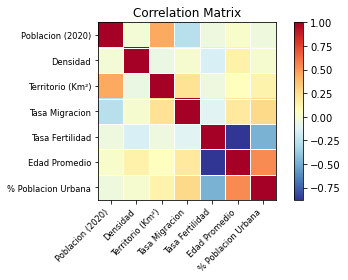

In [29]:
#Graficación de la matriz de correlación con el módulo de python statmodels

corr = df.corr()
sm.graphics.plot_corr(corr, xnames=list(corr.columns))
plt.show()


Como se observa en la matriz de correlación las variables con una correlación negativa más fuerte teniendo en cuenta datos globales, son la Edad Promedio y la Tasa de Fertilidad (número medio de hijos nacidos de las mujeres que, en una determinada sociedad o grupo, han completado su ciclo reproductivo). Aunque para el caso de Europa, la asociación es más débil.

Otras de las variables con una correlación positiva moderada serían:
    la Edad promedio y la % de Población Urbana
    el Territorio (Km2) y la Población (2020)


In [30]:
#Creación de una matriz de correlación por continentes para ver si la realción entre variables se mantiene

df.groupby('Continente').corr()

Poblacion (2020)  Densidad  Territorio (Km²)  \
Continente                                                                    
Africa     Poblacion (2020)            1.000000 -0.053800          0.466534   
           Densidad                   -0.053800  1.000000         -0.424154   
           Territorio (Km²)            0.466534 -0.424154          1.000000   
           Tasa Migracion              0.027045  0.116494          0.034279   
           Tasa Fertilidad             0.212441 -0.171410          0.230797   
           Edad Promedio              -0.162055  0.188461         -0.098949   
           % Poblacion Urbana         -0.179265 -0.221107          0.017407   
America    Poblacion (2020)            1.000000 -0.262516          0.810029   
           Densidad                   -0.262516  1.000000         -0.322149   
           Territorio (Km²)            0.810029 -0.322149          1.000000   
           Tasa Migracion              0.631471 -0.117826          0.573101   
           Tasa Fertilidad            -0.176514 -0.271004         -0.265591   
           Edad Promedio               0.076494  0.436053          0.189964   
           % Poblacion Urbana          0.285767 -0.367589          0.305465   
Asia       Poblacion (2020)            1.000000 -0.071890          0.819177   
           Densidad                   -0.071890  1.000000         -0.116763   
           Territorio (Km²)            0.819177 -0.116763          1.000000   
           Tasa Migracion             -0.700712  0.092994         -0.449108   
           Tasa Fertilidad            -0.103996 -0.360223         -0.046410   
           Edad Promedio               0.080771  0.399207          0.113221   
           % Poblacion Urbana         -0.131053  0.109459         -0.015178   
Europa     Poblacion (2020)            1.000000 -0.082617          0.689738   
           Densidad                   -0.082617  1.000000         -0.113788   
           Territorio (Km²)            0.689738 -0.113788          1.000000   
           Tasa Migracion              0.713455  0.048286          0.246831   
           Tasa Fertilidad             0.213541 -0.108284          0.165909   
           Edad Promedio              -0.023597  0.140095         -0.080549   
           % Poblacion Urbana          0.174594  0.094551          0.054260   
NaN        Poblacion (2020)            1.000000  0.296411          0.299872   
           Densidad                    0.296411  1.000000         -0.649832   
           Territorio (Km²)            0.299872 -0.649832          1.000000   
           Tasa Migracion              0.554581  0.497320         -0.522226   
           Tasa Fertilidad            -0.038550 -0.604784          0.893150   
           Edad Promedio               0.277879  0.557356         -0.726978   
           % Poblacion Urbana          0.493555  0.257197         -0.456786   
Oceania    Poblacion (2020)            1.000000 -0.457734          0.953326   
           Densidad                   -0.457734  1.000000         -0.353216   
           Territorio (Km²)            0.953326 -0.353216          1.000000   
           Tasa Migracion              0.941460 -0.350177          0.995046   
           Tasa Fertilidad            -0.422418  0.281868         -0.432610   
           Edad Promedio               0.491557 -0.403179          0.499484   
           % Poblacion Urbana          0.407274 -0.330630          0.452525   

                               Tasa Migracion  Tasa Fertilidad  Edad Promedio  \
Continente                                                                      
Africa     Poblacion (2020)          0.027045         0.212441      -0.162055   
           Densidad                  0.116494        -0.171410       0.188461   
           Territorio (Km²)          0.034279         0.230797      -0.098949   
           Tasa Migracion            1.000000        -0.082064       0.101509   
           Tasa Fertilidad          -0.082064         1.000000      

Podemos graficar las matrices de correlación para cada continente creando una máscara que es solo una serie de valores booleanos que representan si la columna contiene el elemento específico o no.

Luego se aplica la máscara a nuestro dataset

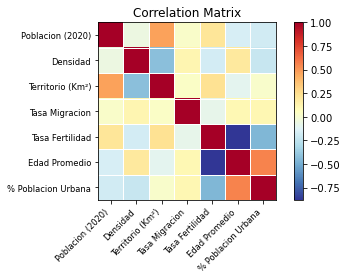

In [31]:
#Graficación de la matriz de correlación con los datos de cada continente

df_mask = df['Continente']=='Africa'

df_africa = df[df_mask]

corr = df_africa.corr()

sm.graphics.plot_corr(corr, xnames=list(corr.columns))
plt.show()

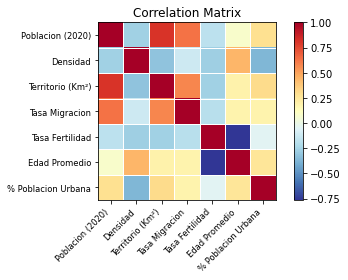

In [32]:
#Graficación de la matriz de correlación con los datos de cada continente

df_mask = df['Continente']=='America'

df_america = df[df_mask]

corr = df_america.corr()

sm.graphics.plot_corr(corr, xnames=list(corr.columns))
plt.show()

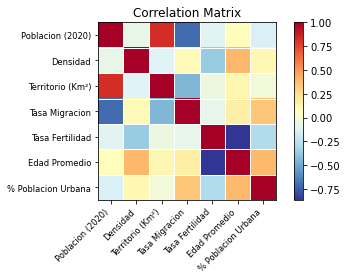

In [33]:
#Graficación de la matriz de correlación con los datos de cada continente

df_mask = df['Continente']=='Asia'

df_asia = df[df_mask]

corr = df_asia.corr()

sm.graphics.plot_corr(corr, xnames=list(corr.columns))
plt.show()

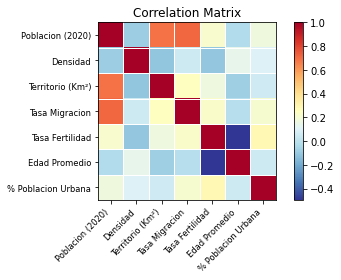

In [34]:
#Graficación de la matriz de correlación con los datos de cada continente

df_mask = df['Continente']=='Europa'

df_europa = df[df_mask]

corr = df_europa.corr()

sm.graphics.plot_corr(corr, xnames=list(corr.columns))
plt.show()

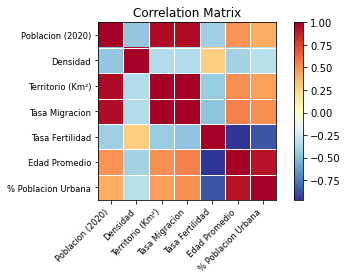

In [35]:
#Graficación de la matriz de correlación con los datos de cada continente

df_mask = df['Continente']=='Oceania'

df_oceania = df[df_mask]

corr = df_oceania.corr()

sm.graphics.plot_corr(corr, xnames=list(corr.columns))
plt.show()

También podría explorarse la distribución de datos por continente, por ejemplo, 

In [36]:
df_america.describe()

,Poblacion (2020),Densidad,Territorio (Km²),Tasa Migracion,Tasa Fertilidad,Edad Promedio,% Poblacion Urbana
count,3.700000e+01,37.000000,3.700000e+01,37.000000,37.000000,37.000000,35.000000
mean,2.761596e+07,154.783784,1.036703e+06,18291.459459,2.124324,32.432432,67.657143
std,6.526662e+07,174.279331,2.435184e+06,202008.595827,0.463924,6.448689,21.879271
min,9.806900e+04,4.000000,1.800000e+02,-653249.000000,1.200000,23.000000,19.000000
25%,3.938930e+05,25.000000,1.001000e+04,-11332.000000,1.800000,28.000000,56.000000
50%,6.491923e+06,66.000000,1.064400e+05,-200.000000,2.100000,31.000000,73.000000
75%,1.797138e+07,298.000000,7.435320e+05,4200.000000,2.400000,36.000000,85.000000
max,3.313410e+08,668.000000,9.147420e+06,954806.000000,3.400000,47.000000,96.000000


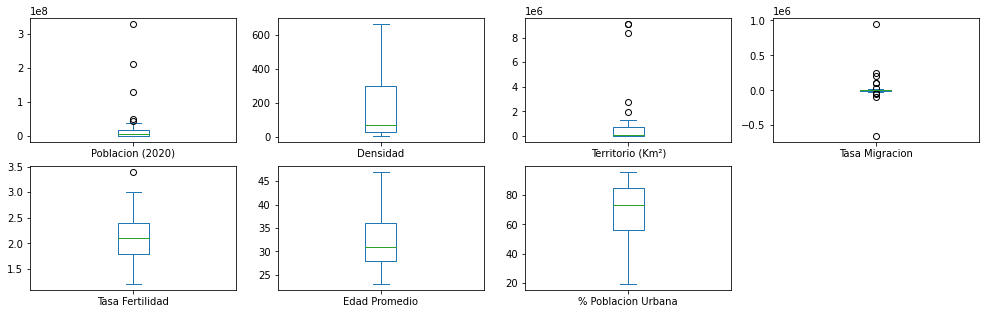

In [37]:
# Para visualizar la distribución de los datos y ver si existen valores extremos se puede hacer un gráfico de cajas y bigotes

df_america.plot(kind='box', subplots=True, layout=(2,4), figsize = (17,5), sharex=False, sharey=False)


plt.show()

Se podría también hacer un ranking por continente de acuerdo a la variable de interés, por ejemplo, el ranking de los cinco paises con la Tasa de Migración más alta de América

In [42]:
df_america = df_america.sort_values('Tasa Migracion', ascending = False)

df_america.head()

,Pais,Poblacion (2020),Densidad,Territorio (Km²),Tasa Migracion,Tasa Fertilidad,Edad Promedio,% Poblacion Urbana,Continente
2,estados unidos,331341050,36,9147420,954806.0,1.8,38,83.0,America
38,canada,37799407,4,9093510,242032.0,1.5,41,81.0,America
28,colombia,50976248,46,1109500,204796.0,1.8,31,80.0,America
62,chile,19144605,26,743532,111708.0,1.7,35,85.0,America
42,peru,33050211,26,1280000,99069.0,2.3,31,79.0,America
